In [1]:
#text updates via Twilio

In [91]:
import requests
from psaw import PushshiftAPI
import datetime
import pandas as pd

import tweepy

from datetime import date

today = date.today()

today_str = today.strftime("%Y-%m-%d")
prev_day = str(int(today_str[-2:len(today_str)])-1)
prev_date = today_str[0:-2] + prev_day

In [168]:
#most_mentioned_tickers

def most_mentioned_tickers(timeframe):
    
    api = PushshiftAPI()
    start_time = datetime.datetime(int(today.strftime("%Y")), int(today.strftime("%m")), int(today.strftime("%d"))).timestamp()
    submitList = list(api.search_submissions(after = start_time, subreddit = 'wallstreetbets', filter=['author', 'title', 'subreddit', 'created_utc'], limit = 200))


    tickerDict = {}
    
    if (timeframe == 'lunch'):
        beg_time = '09'
        end_time = '12'
    if (timeframe == 'close'):
        beg_time = '12'
        end_time = '04'
    if (timeframe == 'afterhours'):
        beg_time = '04'
        end_time = '06'
        
    numlst = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']
    for submission in submitList:
        if (((str(datetime.datetime.fromtimestamp(submission.created_utc))[0:10] == today.strftime("%Y-%m-%d"))
           and 
             (str(datetime.datetime.fromtimestamp(submission.created_utc))[11:13] >= beg_time) or str(datetime.datetime.fromtimestamp(submission.created_utc))[11:13] < end_time)):
            title = submission.title
            taggedStockTickerList = list(set(filter(lambda word: word.startswith('$') and word[1:].lower().islower() and not any(char.isdigit() for char in word), title.split(' '))))
            if len(taggedStockTickerList)>0:
                #print(taggedStockTickerList)

                for stockTicker in taggedStockTickerList:
                    stockTicker = stockTicker[1:].upper()

                    if stockTicker[-1] == '.' or stockTicker[-1] == '!' or stockTicker[-1] == '?' or stockTicker[-1] == ',':
                        stockTicker = stockTicker[:-1]

                    if stockTicker in tickerDict:
                        tickerDict[stockTicker] += 1
                    else:
                        tickerDict[stockTicker] = 1



In [165]:
#condition in pre-market bt 4 pm prev day and 9 am curr day

def most_mentioned_tickers_premarket():
    
    api = PushshiftAPI()
    start_time = datetime.datetime(int(today.strftime("%Y")), int(today.strftime("%m")), int(prev_day)).timestamp()
    submitList = list(api.search_submissions(after = start_time, subreddit = 'wallstreetbets', filter=['author', 'title', 'subreddit', 'created_utc'], limit = 200))
    tickerDict = {}

    numlst = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']
    for submission in submitList:
        if (((str(datetime.datetime.fromtimestamp(submission.created_utc))[0:10] == today.strftime("%Y-%m-%d"))
           and str(datetime.datetime.fromtimestamp(submission.created_utc))[11:13] < '09')
            or (str(datetime.datetime.fromtimestamp(submission.created_utc))[0:10] == today.strftime(prev_day)
           and str(datetime.datetime.fromtimestamp(submission.created_utc))[11:13] >= '16')):

            title = submission.title
            taggedStockTickerList = list(set(filter(lambda word: word.startswith('$') and word[1:].lower().islower() and not any(char.isdigit() for char in word), title.split(' '))))
            if len(taggedStockTickerList)>0:
                #print(taggedStockTickerList)

                for stockTicker in taggedStockTickerList:
                    stockTicker = stockTicker[1:].upper()

                    if stockTicker[-1] == '.' or stockTicker[-1] == '!' or stockTicker[-1] == '?' or stockTicker[-1] == ',':
                        stockTicker = stockTicker[:-1]

                    if stockTicker in tickerDict:
                        tickerDict[stockTicker] += 1
                    else:
                        tickerDict[stockTicker] = 1

                

In [173]:
# weekly stats

def most_mentioned_tickers_weekly():
    api = PushshiftAPI()
    start_time = datetime.datetime(int(today.strftime("%Y")), int(today.strftime("%m")), int(prev_day)-6).timestamp()
    submitList = list(api.search_submissions(after = start_time, subreddit = 'wallstreetbets', filter=['author', 'title', 'subreddit', 'created_utc'], limit = 1))
    tickerDict = {}

    numlst = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']
    for submission in submitList:
        title = submission.title
        taggedStockTickerList = list(set(filter(lambda word: word.startswith('$') and word[1:].lower().islower() and not any(char.isdigit() for char in word), title.split(' '))))
        if len(taggedStockTickerList)>0:
            #print(taggedStockTickerList)

            for stockTicker in taggedStockTickerList:
                stockTicker = stockTicker[1:].upper()

                if stockTicker[-1] == '.' or stockTicker[-1] == '!' or stockTicker[-1] == '?' or stockTicker[-1] == ',':
                    stockTicker = stockTicker[:-1]

                if stockTicker in tickerDict:
                    tickerDict[stockTicker] += 1
                else:
                    tickerDict[stockTicker] = 1

In [174]:
most_mentioned_tickers('lunch')
#datetime.datetime(int(today.strftime("%Y")), int(today.strftime("%m")), int(today.strftime("%d"))).timestamp()

KeyboardInterrupt: 

In [176]:
api = PushshiftAPI()
start_time = datetime.datetime(2021, 10, 25).timestamp()
submitList = list(api.search_submissions(after = start_time, subreddit = 'wallstreetbets', filter=['author', 'title', 'subreddit', 'created_utc'], limit = 100))
tickerDict = {}

numlst = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']
for submission in submitList:
    title = submission.title
    taggedStockTickerList = list(set(filter(lambda word: word.startswith('$') and word[1:].lower().islower() and not any(char.isdigit() for char in word), title.split(' '))))
    if len(taggedStockTickerList)>0:
        #print(taggedStockTickerList)

        for stockTicker in taggedStockTickerList:
            stockTicker = stockTicker[1:].upper()

            if stockTicker[-1] == '.' or stockTicker[-1] == '!' or stockTicker[-1] == '?' or stockTicker[-1] == ',':
                stockTicker = stockTicker[:-1]

            if stockTicker in tickerDict:
                tickerDict[stockTicker] += 1
            else:
                tickerDict[stockTicker] = 1

KeyboardInterrupt: 

In [155]:
datetime.datetime(int(today.strftime("%Y")), int(today.strftime("%m")), int(prev_day)-6).timestamp()

1634702400.0

In [10]:
datetime = datetime.datetime(2013, 9, 20,13,0)
datetime

datetime.datetime(2013, 9, 20, 13, 0)

In [75]:
df = pd.DataFrame([tickerDict.keys(), tickerDict.values()])
df = df.T
df.columns = ['ticker', '# of mentions']
df = df.sort_values(by = '# of mentions', ascending = False)
df.drop(df.tail(df.shape[0]-10).index, inplace = True)
df

,ticker,# of mentions
4,TSLA,12
9,DWAC,7
16,BRPM,6
48,GME,5
0,OCGN,4
15,INO,4
18,HOOD,3
43,MARK,3
24,PROG,3
53,MCAD,3


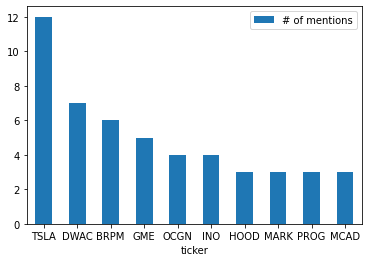

In [77]:
plot = df.plot.bar(x = 'ticker', rot = 0)

In [69]:


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)

api = tweepy.API(auth)

In [70]:
saved_fig = plot.get_figure().savefig('C:\\Users\\kkama\\OneDrive\\Documents\\RobinInvestImages\\image.png')

In [71]:
status = "Today's Top 5's of #wsb"
media = api.update_with_media('C:\\Users\\kkama\\OneDrive\\Documents\\RobinInvestImages\\image.png', status)